In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
data_input = pandas.read_csv("Car_Insurance_Claim 1.csv")
data = pandas.DataFrame(data_input)
print(data)

          ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0     569520    65+  female  majority               0-9y  high school   
1     750365  16-25    male  majority               0-9y         none   
2     199901  16-25  female  majority               0-9y  high school   
3     478866  16-25    male  majority               0-9y   university   
4     731664  26-39    male  majority             10-19y         none   
...      ...    ...     ...       ...                ...          ...   
9995  323164  26-39  female  majority             10-19y   university   
9996  910346  26-39  female  majority             10-19y         none   
9997  468409  26-39    male  majority               0-9y  high school   
9998  903459  26-39  female  majority             10-19y  high school   
9999  442696  26-39  female  majority               0-9y         none   

             INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0       upper class      0.629027            

In [3]:
new_data = data_input.drop(columns=["ID"])
print(new_data.isnull().sum())

mising_value = new_data.isnull().sum() # mising value

age = []
for init in new_data["AGE"]:
    if "+" in init:
        to_int_plus = init.replace("+" ,"")
        age.append(int(to_int_plus))
    else:
        rage_of_age = init.split("-")
        mean_element = 0
        for i in rage_of_age:
            to_int = int(i)
            mean_element = mean_element + to_int
        age.append(mean_element/2)

mean_of_age = np.mean(age) # mean of age
print("------")
print(f"MEAN OF AGE TOTAL USER: {mean_of_age}")
print("------")
handler = -1
for iny in data.dtypes:
    if iny == "int64" or iny == "float64": 
        print(f"{new_data.columns[handler]}\t\t\t{iny}") # numeric varibale [columns]
    handler += 1


AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64
------
MEAN OF AGE TOTAL USER: 42.26375
------
OUTCOME			int64
CREDIT_SCORE			float64
VEHICLE_OWNERSHIP			int64
MARRIED			int64
CHILDREN			int64
POSTAL_CODE			int64
ANNUAL_MILEAGE			float64
SPEEDING_VIOLATIONS			int64
DUIS			int64
PAST_ACCIDENTS			int64
OUTCOME			int64


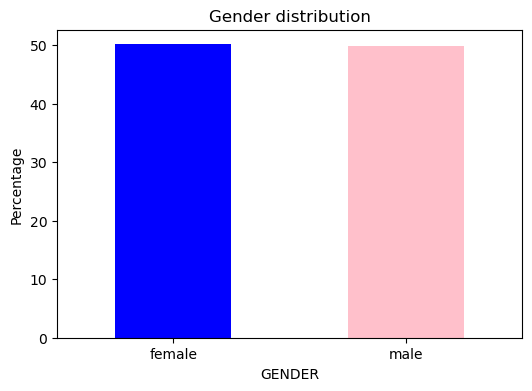

GENDER
female    50.1
male      49.9
Name: proportion, dtype: float64


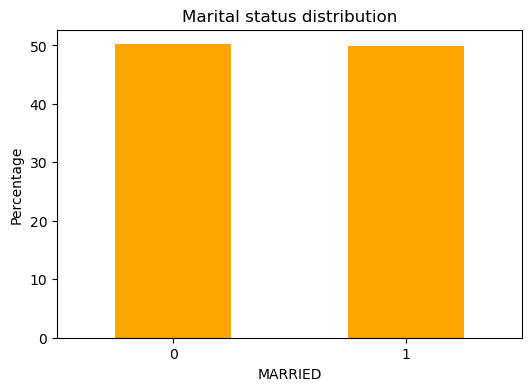

MARRIED
0    50.18
1    49.82
Name: proportion, dtype: float64


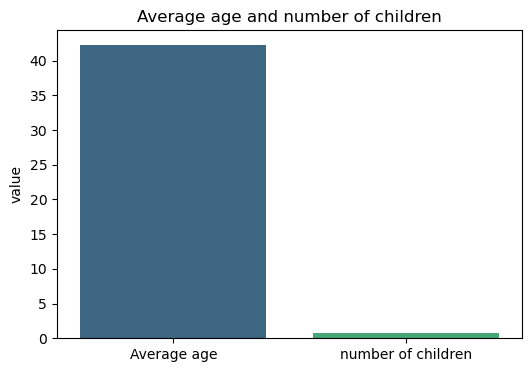

number of children : 0.6888
mean of age : 42.26375



In [4]:
mean_age = mean_of_age
gender_dis = new_data['GENDER'].value_counts(normalize=True) * 100
mean_child = new_data['CHILDREN'].mean()
married = new_data['MARRIED'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
gender_dis.plot(kind='bar', color=['blue', 'pink'])
plt.title("Gender distribution")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()
print(gender_dis)

plt.figure(figsize=(6, 4))
married.plot(kind='bar', color='orange')
plt.title("Marital status distribution")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()
print(married)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Average age" ,"number of children"], y=[mean_age, mean_child], palette="viridis" , hue=["Average age" ,"number of children"])
plt.title("Average age and number of children")
plt.ylabel("value")
plt.show()
print(f"number of children : {mean_child}\nmean of age : {mean_age}\n")

In [6]:
numeric_columns = new_data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    new_data = new_data[(new_data[col] >= lower_bound) & (new_data[col] <= upper_bound)]
new_data

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
7,26-39,female,majority,0-9y,university,working class,0.468689,0,after 2015,0,1,10238,14000.0,sedan,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,40-64,female,majority,20-29y,high school,poverty,0.340146,1,before 2015,1,1,10238,8000.0,sedan,1,0,0,0
9984,26-39,female,majority,10-19y,high school,middle class,0.679795,0,before 2015,0,0,32765,15000.0,sedan,1,0,0,1
9990,16-25,female,majority,0-9y,high school,working class,0.502120,1,before 2015,0,1,32765,10000.0,sedan,0,0,0,1
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0


In [7]:
balance = new_data['OUTCOME'].value_counts()
print(balance)
print(new_data['OUTCOME'].value_counts(normalize=True) * 100)
print("OUTCOME not balance [ 67% -> 0 ] and [ 31% -> 1 ]")

OUTCOME
1    1887
0    1784
Name: count, dtype: int64
OUTCOME
1    51.402887
0    48.597113
Name: proportion, dtype: float64
OUTCOME not balance [ 67% -> 0 ] and [ 31% -> 1 ]


<div dir="rtl">
    <h3> مصور سازی ویژگی های دیگر براساس outcome</h3>
    <h5>در این قسمت یک شرح کلی از داده ها خواهیم داشت بر اساس ویژگی تخلف آنها</h5>
</div>

<div align=right dir="rtl">
    در اینجا مشخص شده که بیشترین بازه سنی که منجر به تخلف شدند کدام دسته از سن ها هستن همچنین طبق نمودار مشخص شده است که مردان نسبت به زنان درصدتخلف بالاتری دارند همچنین با بررسی و مقایسه تعداد سال تجربه در رانندگی مشخص شد آن دسته از افرادی که سابقه کم تر از 9 سال در رانندگی دارند احتمال تخلفشان از سایرین با اختلاف بالا بیشتر است همچنین میزان تحصیل افراد نیز مشخص کننده این است که با افزایش آگاهی و تحصیلات از بدون تحصیل تا دبیرستان و درنهایت دانشگاه میزان تخلف نزولی است همچنین به استنباط هم میتوان رسید که افراد متعهل نسبت به افراد مجرد کم تر تخلف میکنند و شاخص outcome آنها کم تر است
</div> 

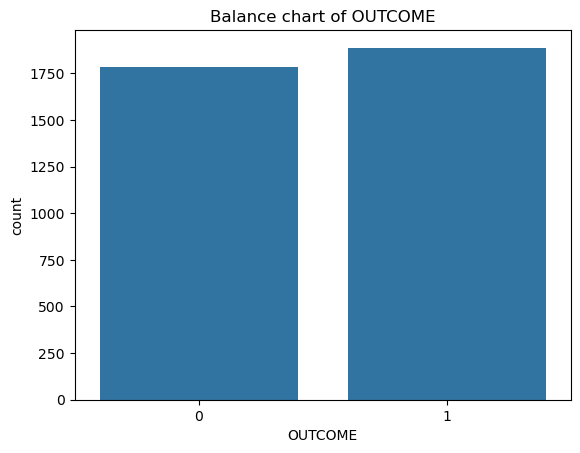

-------


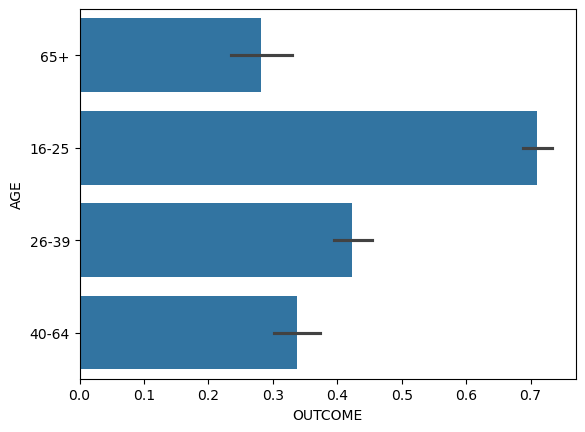

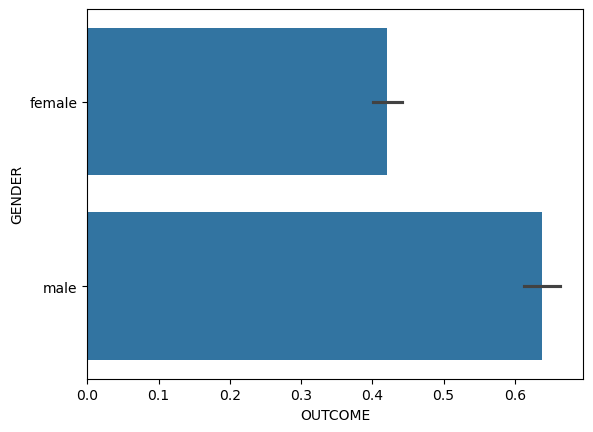

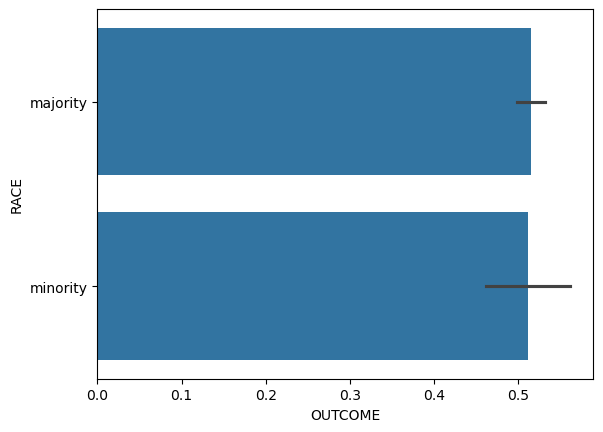

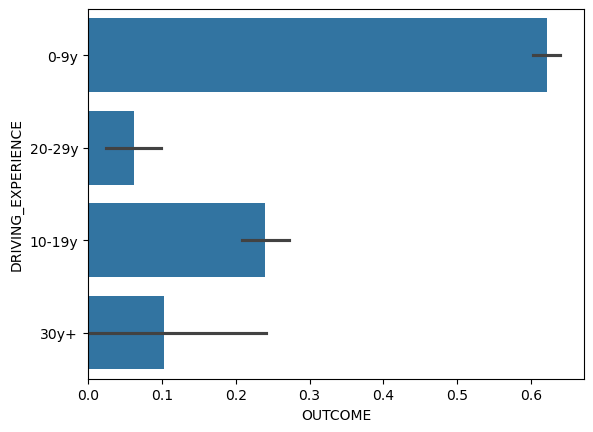

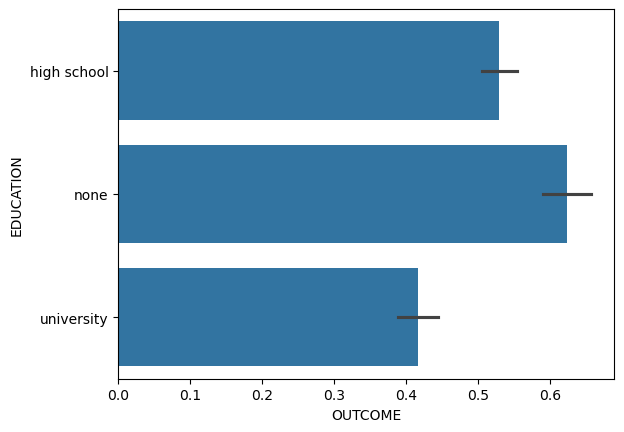

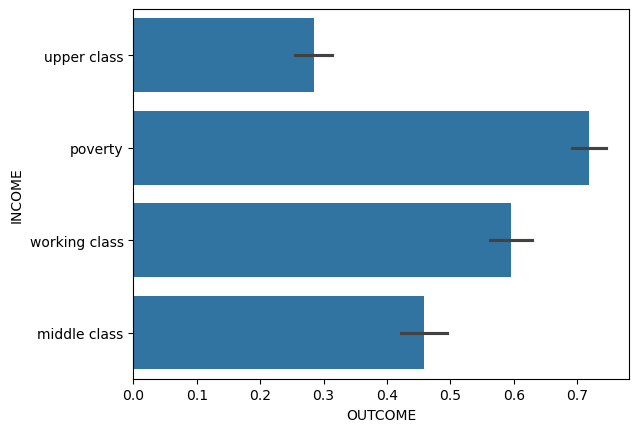

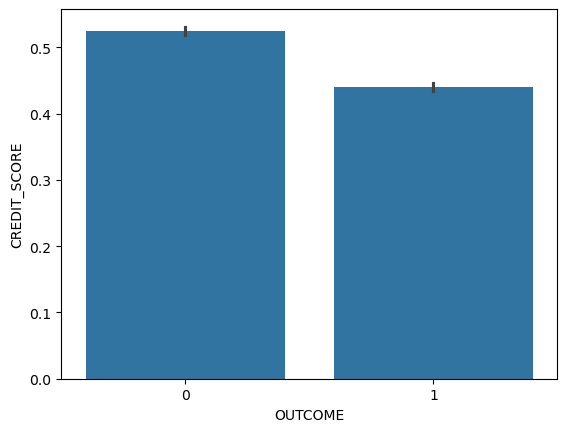

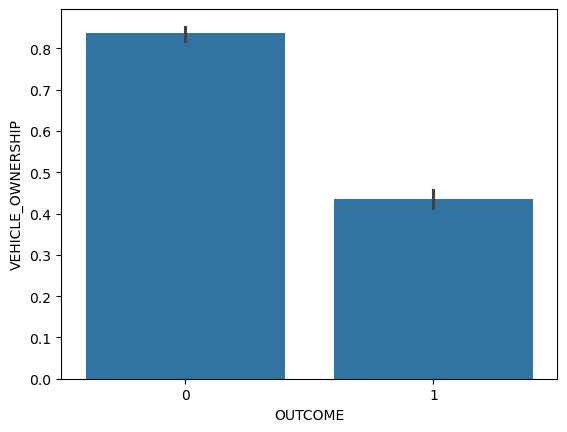

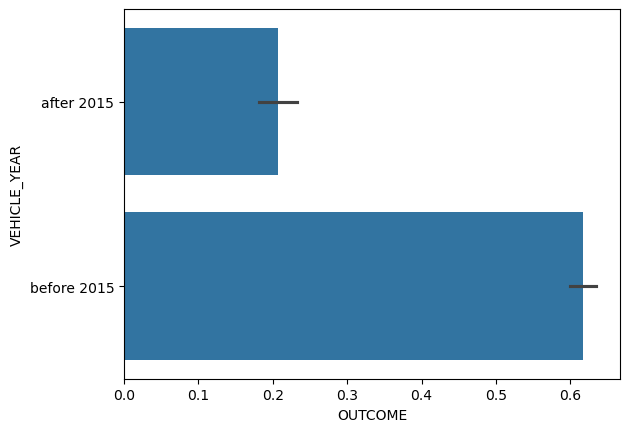

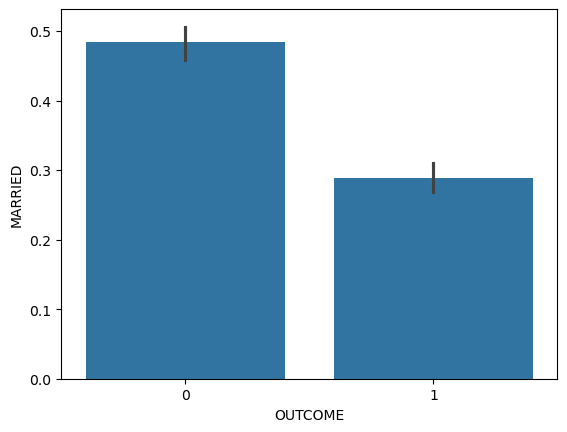

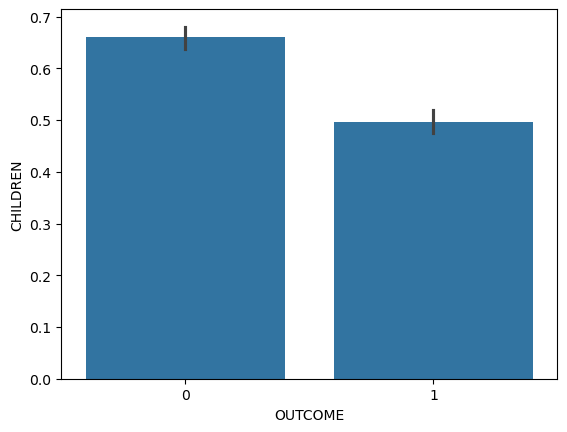

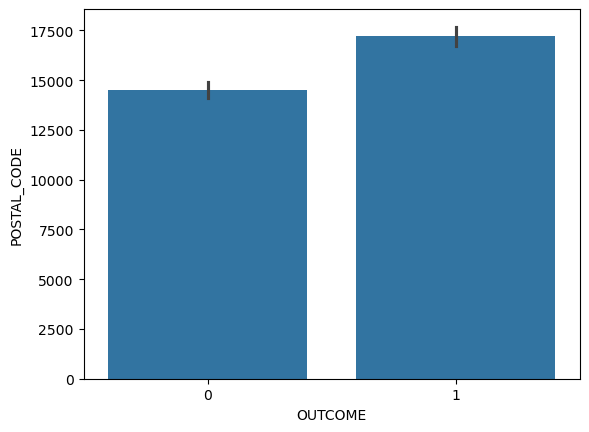

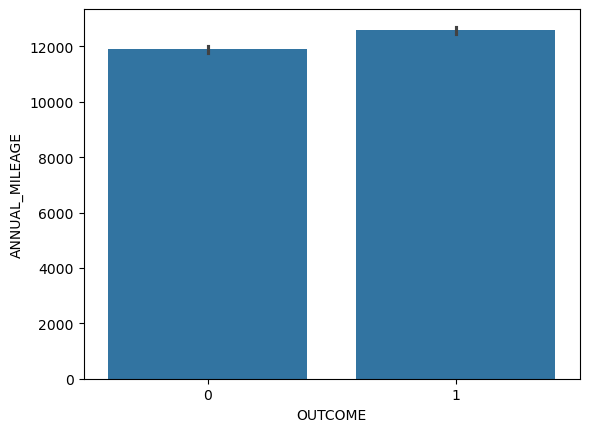

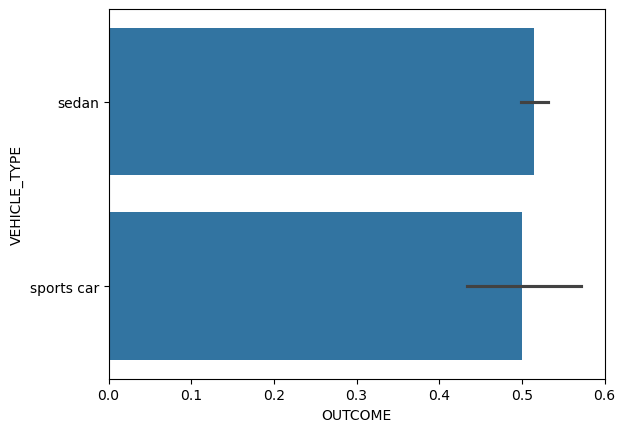

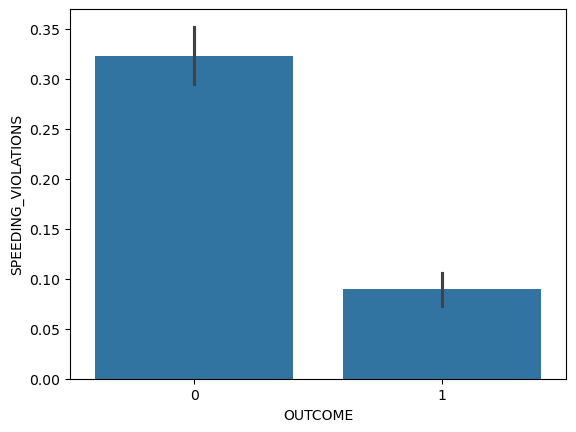

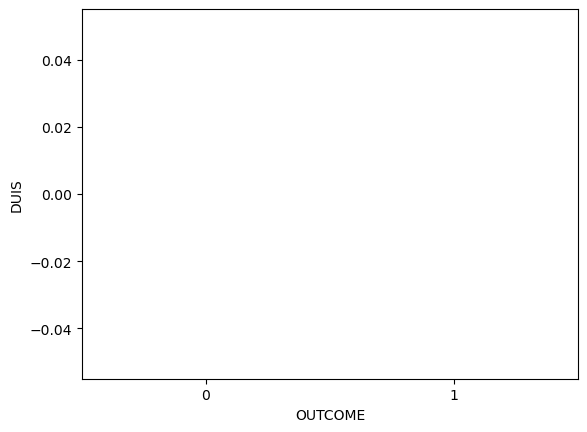

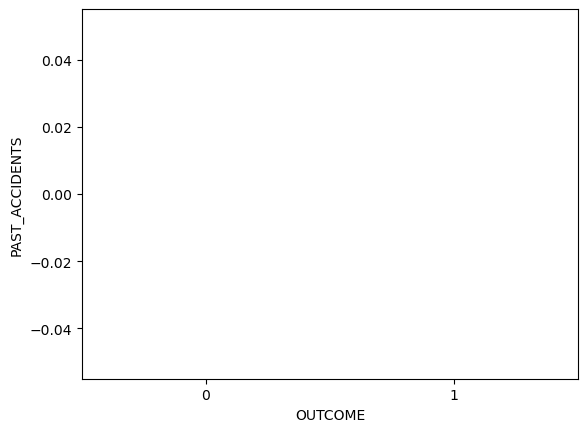

In [8]:
sns.countplot(x="OUTCOME", data=new_data)
plt.title("Balance chart of OUTCOME")
plt.show()
print("-------")
# Comparing OUTCOME with the column
for col in new_data.columns:
    if col == "OUTCOME":
        break
    else:
        sns.barplot(x="OUTCOME", y=col,data=new_data)
        plt.show()

In [9]:
class_outcome_0 = new_data[new_data['OUTCOME'] == 0]
class_outcome_1 = new_data[new_data['OUTCOME'] == 1]
class_outcome_0 # order data to part OUTCOME = 0 and OUTCOME = 1

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
8,40-64,female,majority,20-29y,university,working class,0.521815,0,before 2015,1,0,10238,13000.0,sedan,0,0,0,0
25,26-39,female,majority,10-19y,university,middle class,0.551970,1,before 2015,1,0,10238,14000.0,sports car,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,26-39,male,minority,10-19y,none,working class,0.543983,1,before 2015,1,1,10238,11000.0,sedan,1,0,0,0
9978,40-64,female,majority,20-29y,high school,upper class,0.670593,1,before 2015,1,0,10238,13000.0,sedan,0,0,0,0
9980,40-64,female,majority,20-29y,high school,poverty,0.340146,1,before 2015,1,1,10238,8000.0,sedan,1,0,0,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0


<div align=right dir="rtl">
    <h5> حالا باید برای بالانس سازی داده ها بر اساس outcome اون دسته ای از کلاس ها که یا 0 هست یا 1 رو که از اون یکی کلاس کم تر هست رو مقدار نمونه اش رو زیاد کنیم یعنی oversampling بکنیم که در اینجا 1 از 0 مقدار کم تری دارد که در سکشن قبل نمودار مقایسه ای آن را رسم کردیم</h5>
</div>

<div align=right dir="rtl">
    <h4> روش دیگری برای بالانس کردن دیتا وجود دارد اینکه بجای افزایش داده اون ویژگی کم تر. داده ویژگی بیشتر را کم کنیم</h4>
    <ul>
        <li>Oversampling</li>
        <li>Undersampling</li>
    </ul>
    که من در اینجا کلاس 0 رو که کم تر از 1 بود رو اضافه کردم. (Oversampling) به تعداد مقدار کلاس 1 و درنهایت این 2 کلاس رو با یکدیگر ادغام کردم
</div>

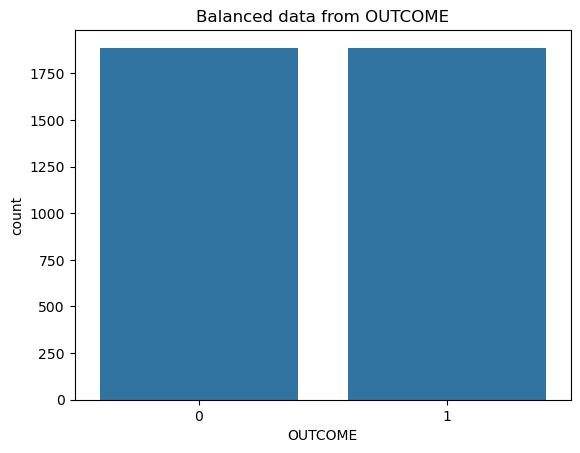

OUTCOME
1    50.0
0    50.0
Name: proportion, dtype: float64


In [10]:
class_0_oversampled = class_outcome_0.sample(len(class_outcome_1), replace=True, random_state=42)
balanced_data = pandas.concat([class_outcome_1, class_0_oversampled])
sns.countplot(x="OUTCOME", data=balanced_data)
plt.title("Balanced data from OUTCOME")
plt.show()

print(balanced_data["OUTCOME"].value_counts(normalize=True) * 100)

In [11]:
balanced_data # balanced data from outcome ;D

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
7,26-39,female,majority,0-9y,university,working class,0.468689,0,after 2015,0,1,10238,14000.0,sedan,0,0,0,1
9,40-64,female,majority,0-9y,high school,upper class,0.561531,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,1
19,16-25,female,majority,0-9y,high school,working class,0.417714,1,before 2015,0,1,10238,18000.0,sedan,0,0,0,1
20,16-25,female,majority,0-9y,high school,working class,0.409514,0,before 2015,0,0,10238,17000.0,sedan,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,26-39,female,majority,10-19y,high school,poverty,0.617333,1,before 2015,0,1,10238,13000.0,sedan,0,0,0,0
7892,65+,male,majority,10-19y,university,upper class,0.645755,1,after 2015,1,1,32765,9000.0,sedan,2,0,0,0
4017,16-25,female,majority,0-9y,high school,middle class,0.588417,1,after 2015,0,0,32765,12000.0,sedan,0,0,0,0
4502,40-64,male,majority,0-9y,university,upper class,0.700904,1,after 2015,1,1,10238,13000.0,sedan,0,0,0,0


In [12]:
data_to_numeric = pandas.get_dummies(new_data, dtype=int, drop_first=True) # TRUE = 1 - FALSE = 0
data_to_numeric

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.629027,1,0,1,10238,12000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.357757,0,0,0,10238,16000.0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,0.493146,1,0,0,10238,11000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.206013,1,0,1,32765,11000.0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
7,0.468689,0,0,1,10238,14000.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0.340146,1,1,1,10238,8000.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9984,0.679795,0,0,0,32765,15000.0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
9990,0.502120,1,0,1,32765,10000.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
9997,0.470940,1,0,1,10238,14000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Model training and testing

In [13]:
X = data_to_numeric.drop(columns=['OUTCOME'])   # input variable [ all of colume for input without OUTCOME ]
Y = data_to_numeric['OUTCOME']  # output variable [ target colume is OUTCOME ]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=104, test_size=0.25, shuffle=True)
print('X_train : ') 
print(X_train.head()) 
print('') 
print('X_test : ') 
print(X_test.head()) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())

X_train : 
      CREDIT_SCORE  VEHICLE_OWNERSHIP  MARRIED  CHILDREN  POSTAL_CODE  \
1429      0.582356                  1        1         1        10238   
8635      0.671695                  1        1         1        32765   
5347      0.393021                  0        0         1        10238   
5632      0.344721                  1        1         0        10238   
6122      0.487613                  1        0         0        10238   

      ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  AGE_26-39  \
1429         12000.0                    0     0               0          0   
8635         10000.0                    0     0               0          0   
5347         12000.0                    1     0               0          1   
5632         13000.0                    0     0               0          0   
6122         17000.0                    0     0               0          0   

      ...  DRIVING_EXPERIENCE_10-19y  DRIVING_EXPERIENCE_20-29y  \
1429  ...     

<div align="right" dir="rtl">
    در این قسمت داده های خود را به 2 قسمت آموزشی و آزمون تقسیم بندی میکنیم در این بخش برای یادگیری مدل خود 75 درصد داده را برای آموزش با خروجی outcome در نظر میگیریم و 25 درصد از دیتا باقی مانده را برای تست مدل خودمون در این جا 2 متغیر X , Y تعریف شده که متغیر X ورودی ما هستش یعنی تمام ویژگی های دیتا یا همان تمام ستون های جدول به جز OUTCOME و متغیر Y خروجی نهایی ما یا همان تشخیص متخلف بودن یا نبودن شخص هست یعنی تنها ستون OUTCOME
</div>

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[294 174]
 [205 245]]
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       468
           1       0.58      0.54      0.56       450

    accuracy                           0.59       918
   macro avg       0.59      0.59      0.59       918
weighted avg       0.59      0.59      0.59       918



## ماتریس درهم ریختگی
[[294 174]
 [205 245]]

<div dir="rtl">
    این ماتریس نشان می‌دهد که چگونه پیش‌بینی‌های مدل با نتایج واقعی و مدل آموزشی ما مطابقت دارند:
    <br>
    <li>[294]: تعداد نمونه‌هایی که مدل درستاً کلاس 0 را پیش‌بینی کرده است (True Negatives).</li>
    <li>[174]: تعداد نمونه‌هایی که مدل اشتباهاً کلاس 1 را به عنوان کلاس 0 پیش‌بینی کرده است (False Positives).</li
    <li>[205]: تعداد نمونه‌هایی که مدل اشتباهاً کلاس 0 را به عنوان کلاس 1 پیش‌بینی کرده است (False Negatives).</li>
    <li>[245]: تعداد نمونه‌هایی که مدل درستاً کلاس 1 را پیش‌بینی کرده است (True Positives).</li>
</div>

<div dir="rtl">
    در بخش بعدی مدل 59 درصد برای 0 پیشبینی درستی کرده و برای 1 این دقت به 58 درصد رسیده فراخوانی بعدی که recall هست نشان دهنده این است که چند درصد نمونه های واقعی و آزمون ما به درستی پیشبینی شده اند که در اینجا 63 درصد برای 0 و 56 درصد برای 1 بوده و درنهایت دقت این مدل 59 درصد بوده
</div>

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

importance = pandas.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,CREDIT_SCORE,0.225255
5,ANNUAL_MILEAGE,0.129012
1,VEHICLE_OWNERSHIP,0.117973
22,VEHICLE_YEAR_before 2015,0.080324
14,DRIVING_EXPERIENCE_10-19y,0.050911
12,GENDER_male,0.045793
4,POSTAL_CODE,0.043942
6,SPEEDING_VIOLATIONS,0.031682
2,MARRIED,0.030709
20,INCOME_upper class,0.028180


<div dir="rtl">
    در این بخش با استفاده از درخت تصمیم اهمیت و مهم بودن هرکدام از ویژگی های دیتای ما از صعودی به نزولی طبقه بندی شد که امتیاز اعتباری یا CREDIT_SCORE از اهمیت بالایی برای تشخیص OUTCOME برخوردار بود که بعد از آن ویژگی ANNUAL_MILEAGE	یا مسافت پیموده شده در سال است درحالی که در شرح ابتدایی درصد اهمیت سن و سابقه رانندگی و وضعیت تعهل و میزان تحصیلات در این مدل اهمیت چندانی نداشتند
    <h5>مهم ترین و تاثیرگذار ترین ویژگی ها:</h5>
<ol>
    <li>CREDIT_SCORE</li>
    <li>ANNUAL_MILEAGE</li>
    <li>VEHICLE_OWNERSHIP</li>
</ol>
<h5>کم اهمیت ترین ویژگی ها:</h5>
<ol>
    <li>PAST_ACCIDENTS & DUIS</li>
    <li>DRIVING_EXPERIENCE_30y+	</li>
    <li>َAGE_65+</li>
</ol>
</div>

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=0.01,

In [18]:
model = SVC(C=10 ,gamma=0.01 ,kernel="rbf")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[324 144]
 [ 86 364]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       468
           1       0.72      0.81      0.76       450

    accuracy                           0.75       918
   macro avg       0.75      0.75      0.75       918
weighted avg       0.75      0.75      0.75       918



<div align="right" dir="rtl">
    در مرحله آخر با استفاده از gridsearchCV بهترین مقدار هایپرپارامتر ها برای مدل svm شناسایی شد که در اینجا: <b>C = 10</b> , <b>gamma = 0.01</b>, <b>kernel= rbf</b> این مقدار ها برای این 3 هایپرپارامتر بهینه ترین حالت ممکن هستن که اگر یک باره دیگه مدل را با تنظیم این هایپرپارامتر ها آموزش بدیم و predict کنیم همونطور که ملاحظه میکنید <b>دقت مدل به 75 درصد رسیده</b> حتی 
    <b>ماتریس درهمریختگی هم از ماتریس اولی بهتر است و نشان دهنده این است که جای 294 به 324 ارتقا پیدا کرده برای پیشبینی درست مقدار 0 در OUTCOME و همچنین مقدار خطایی که مدل قبل اشتباها 1 را به جای 0 پیشبینی کرده بود از 174 به 144 کاهش پیدا کرده و همچنین تعداد نمونه هایی که مدل اشتباها 0 را به جای کلاس 1 پیشبینی کرده با یک کاهش فاحش از 205 به 86 و درنهایت درستی پیشبینی مدل برای کلاس 1 از 245 به 364 ارتقا پیدا کرده است</b>
</div>